- Basic dataframe operations

- Categorical column analysis

    - frequency table

    - Relative frequency table

    - bar chart

    - pie chart

    - subplots

- Numerical column analysis

    - Statistical operations

    - Percentile Quantile

    - Emperical rule

    - histogram

    - boxplot

- Outlier analysis

    - Box plot analysis

    - How to find the outliers

    - How to treat the outliers

# Bi-Multi variate analysis

In [1]:
# import the packages
# Read the data
# divide into cat and num columns

# Import the pacakges
# Read the data
# cat and num columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Naresh IT\Datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols,cat_cols

(Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object'),
 Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
        'requires_job_training', 'region_of_employment', 'unit_of_wage',
        'full_time_position', 'case_status'],
       dtype='object'))

**task**

- lets take continent and case_status

- continent has 6 lables are there, each label has different count

- case status has 2 lables certified and denied

- I want to know how many asia aplicants visa certified and how many denied


In [3]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [ ]:
# step-1: con1=visa_df['continent']=='asia'
# step-2: con2= visa['cs']=='cert'
# step-3: cert_con=con1&con2
# step-4: visa_df[cert_con]

In [6]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=visa_df['case_status']=='Denied'
cert_con=con1&con2
den_con=con1&con3
cert_data=visa_df[cert_con]
den_data=visa_df[den_con]
print("certified applicants from Asia is:",len(cert_data))
print("denied applicants from Asia is:",len(den_data))

certified applicants from Asia is: 11012
denied applicants from Asia is: 5849


In [7]:
for i in visa_df['continent'].unique():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1&con3
    cert_data=visa_df[cert_con]
    den_data=visa_df[den_con]
    print(f"certified applicants from {i} is:",len(cert_data))
    print(f"denied applicants from {i} is:",len(den_data))

certified applicants from Asia is: 11012
denied applicants from Asia is: 5849
certified applicants from Africa is: 397
denied applicants from Africa is: 154
certified applicants from North America is: 2037
denied applicants from North America is: 1255
certified applicants from Europe is: 2957
denied applicants from Europe is: 775
certified applicants from South America is: 493
denied applicants from South America is: 359
certified applicants from Oceania is: 122
denied applicants from Oceania is: 70


In [8]:
cert_count,den_count=[],[]
for i in visa_df['continent'].unique():
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1&con3
    cert_data=visa_df[cert_con]
    den_data=visa_df[den_con]
    cert_count.append(len(cert_data))
    den_count.append(len(den_data))
cert_count,den_count

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [11]:
visa_df['continent'].unique(),visa_df['case_status'].unique()

(array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
        'Oceania'], dtype=object),
 array(['Denied', 'Certified'], dtype=object))

In [13]:
pd.DataFrame(zip(den_count,cert_count),
             index=visa_df['continent'].unique(),
            columns=visa_df['case_status'].unique(),
        )

,Denied,Certified
Asia,5849,11012
Africa,154,397
North America,1255,2037
Europe,775,2957
South America,359,493
Oceania,70,122


**cross tab**

In [14]:
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col1,col2)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [15]:
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col2,col1)

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [17]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
id=col1
cols=[col3,col2]
pd.crosstab(index=col1,columns=cols)

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

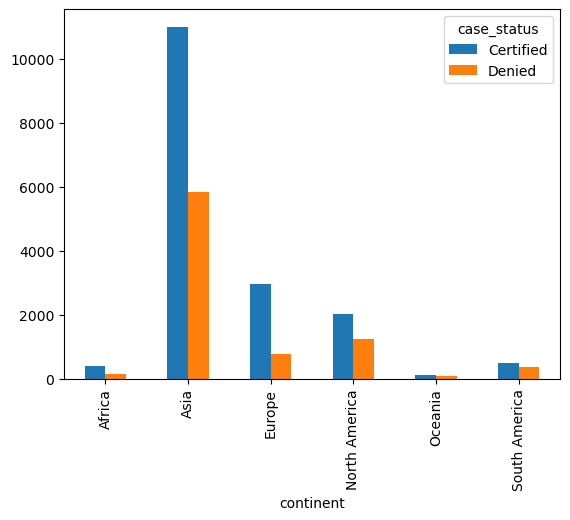

In [19]:
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1.plot(kind='bar')
# how to add number on bar

<Axes: xlabel='continent'>

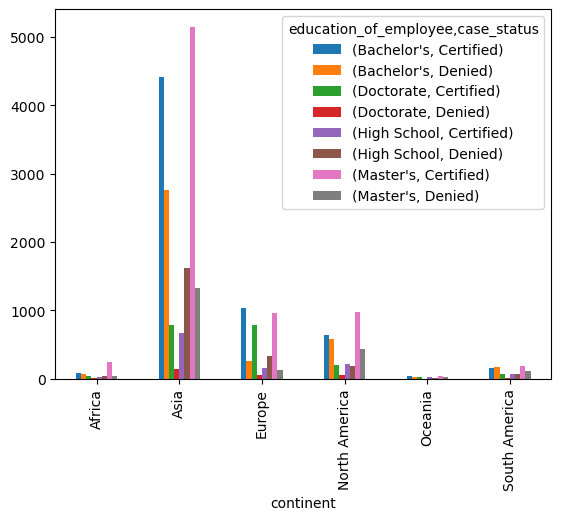

In [20]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
id=col1
cols=[col3,col2]
r3=pd.crosstab(index=col1,columns=cols)
r3.plot(kind='bar')

**scatter plots**

- scatter plots used for identify the relation between two numerical columns

- it is under matplotlib **plt.scatter**

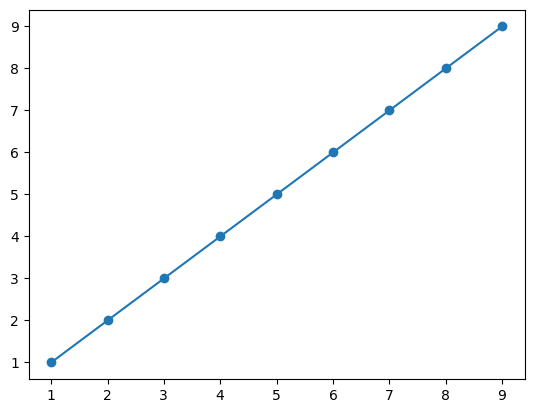

In [23]:
x=range(1,10) # [i for i in range(1,10)]
y=range(1,10) # [i for i in range(1,10)]
plt.scatter(x,y) # dots
plt.plot(x,y)    # dots connected

In [ ]:
x   y
-4  16
-3  9
-2  4
-1  1
0   0
1   1
2   4
3   9
4   16

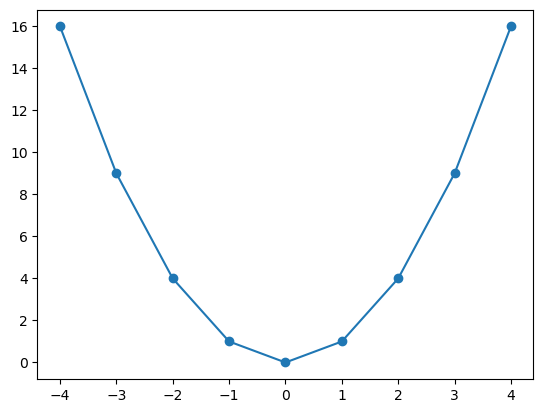

In [29]:
x=range(-4,5)
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [2]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

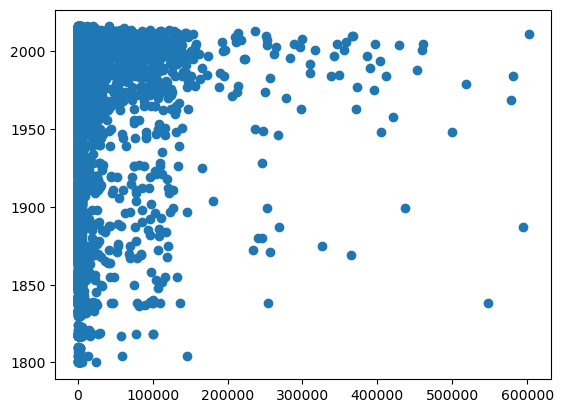

In [3]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

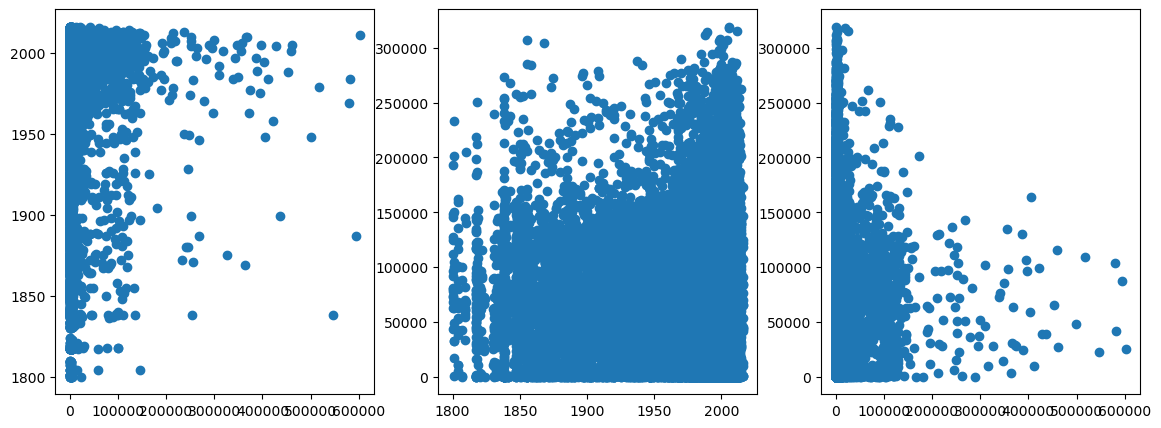

In [6]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,5))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

## Correlation

- By seeing the graph we are not able to explain the relationship properly

- For this we need to get Correlation matrix

- It is provide the values between -1 to 1

    - -1 to 0 indicates negative relation

    - close to 0 or exactly 0 indicates no relation

    - 1 to 0 indicates postive relation

- the method name is **data.corr**

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="RFWOZ_70IMuhnesP7t7N8A4_9" data-atf="0">

In [10]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


- we have total 3 numerical columns

- so we are getting a 3x3 matrix

- other than diagonal values all other are close to zero

- which indicates the columns does not have any relation

**Heat map**

- Assume that we have 10 columns are there 

- Then the matrix has 10x10 total 100 values

- It is hard find quickly the highest value and lowest value

- For that **Heat map visualization is always better**

- Heat map will provide colors to range of values

    - Example -1 to -0.5 indicate as black color

    - by seeing the black color the user can immediately thinks about the value range
 
- It is available in ths seaborn : **sns.heatmap**

<Axes: >

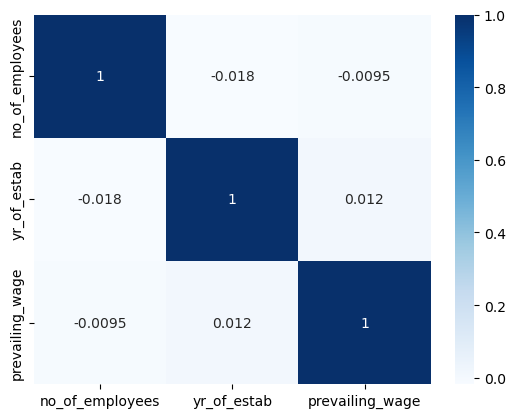

In [21]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,
           annot=True,
           cmap='Blues')

In [22]:
sns.__version__

'0.13.2'

In [ ]:
pip uninstall seaborn
pip install seaborn==0.13.2

anaconda prompt